# Case Study- Boston Marathon
### - Mansi Somani

In [294]:
#importing libraries
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import to_datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error

In [295]:
#reading the data in 2 parts since the structure of data is different (1st part consists of data from year 1897 to 2014, 2nd part consists of data from 2015 to 2019)
csv_files_1897_2014 = sorted(glob('Data_1897_2014/results*.csv'))
csv_files_2015_2019 = sorted(glob('Data_2015_2019/results*.csv'))

In [296]:
#creating empty dataframes to store the winners' data for men's and women's category 
df_menwinners_1897_2014 = pd.DataFrame()
df_menwinners_2015_2019 = pd.DataFrame()
df_womenwinners_1897_2014 = pd.DataFrame()
df_womenwinners_2015_2019 = pd.DataFrame()

In [297]:
#extracting data of marathon winners in men's category from year 1897 to 2014
#sorting data in each file based on finishing time (seconds) and then appending winner's data for each year to the empty dataframe
for file in csv_files_1897_2014:
    df_temp = pd.read_csv(file, usecols = ['display_name', 'age', 'gender', 'residence', 'official_time', 'overall', 'gender_result', 'division_result', 'seconds'])
    df_temp = df_temp.query("gender=='M'")
    df_temp = df_temp.sort_values(by='seconds')
    df_menwinners_1897_2014 = df_menwinners_1897_2014.append(df_temp.iloc[0], ignore_index=True)

df_menwinners_1897_2014.insert(0, 'year', df_menwinners_1897_2014.index+1897)
df_menwinners_1897_2014.rename(columns = {'display_name':'name', 'seconds':'finishing_time_seconds'}, inplace=True)
df_menwinners_1897_2014.head()

,year,age,name,division_result,gender,gender_result,official_time,overall,residence,finishing_time_seconds
0,1897,23.0,John J. McDermott,1.0,M,1.0,2:55:10,1.0,New York City,10510.0
1,1898,22.0,Ronald MacDonald,1.0,M,1.0,2:42:00,1.0,Canada,9720.0
2,1899,23.0,Lawrence Brignolia,1.0,M,1.0,2:54:38,1.0,"Boston, MA",10478.0
3,1900,0.0,John P Caffrey,1.0,M,1.0,2:39:44,1.0,NaN,9584.0
4,1901,0.0,John P Caffrey,1.0,M,1.0,2:39:44,1.0,NaN,9584.0


In [298]:
#extracting data of marathon winners in women's category from year 1897 to 2014
#sorting data in each file based on finishing time (seconds) and then appending winner's data for each year to the empty dataframe
for file in csv_files_1897_2014:
    df_temp = pd.read_csv(file, usecols = ['display_name', 'age', 'gender', 'residence', 'official_time', 'overall', 'gender_result', 'division_result', 'seconds'])
    if 'F' in df_temp.values :
        df_temp = df_temp.query("gender=='F'")
        df_temp = df_temp.sort_values(by='seconds')
        df_womenwinners_1897_2014 = df_womenwinners_1897_2014.append(df_temp.iloc[0], ignore_index=True)
    else :
        print("Women's data not available for this year")

df_womenwinners_1897_2014.insert(0, 'year', df_womenwinners_1897_2014.index+1972)
df_womenwinners_1897_2014.rename(columns = {'display_name':'name', 'seconds':'finishing_time_seconds'}, inplace=True)
df_womenwinners_1897_2014

Women's data not available for this year
Women's data not available for this year
Women's data not available for this year
Women's data not available for this year
Women's data not available for this year
Women's data not available for this year
Women's data not available for this year
Women's data not available for this year
Women's data not available for this year
Women's data not available for this year
Women's data not available for this year
Women's data not available for this year
Women's data not available for this year
Women's data not available for this year
Women's data not available for this year
Women's data not available for this year
Women's data not available for this year
Women's data not available for this year
Women's data not available for this year
Women's data not available for this year
Women's data not available for this year
Women's data not available for this year
Women's data not available for this year
Women's data not available for this year
Women's data not

,year,age,name,division_result,gender,gender_result,official_time,overall,residence,finishing_time_seconds
0,1972,0.0,Nina Kuscsik,1.0,F,1.0,3:10:26,278.0,NaN,11426.0
1,1973,0.0,Jacqueline A Hansen,1.0,F,1.0,3:05:59,151.0,NaN,11159.0
2,1974,0.0,Michiko Gorman,1.0,F,1.0,2:47:11,151.0,NaN,10031.0
3,1975,0.0,Liane Winter,1.0,F,1.0,2:42:24,339.0,NaN,9744.0
4,1976,0.0,Kim Merritt,1.0,F,1.0,2:47:10,163.0,NaN,10030.0
5,1977,0.0,Miki Gorman,1.0,F,1.0,2:48:33,417.0,NaN,10113.0
6,1978,0.0,Gayle Barron,1.0,F,1.0,2:44:52,768.0,NaN,9892.0
7,1979,0.0,Joan Benoit,1.0,F,1.0,2:35:15,474.0,NaN,9315.0
8,1980,0.0,Patti M Lyons,1.0,F,1.0,2:35:06,214.0,NaN,9306.0
9,1981,0.0,Allison Roe,1.0,F,1.0,2:26:06,168.0,NaN,8766.0


In [299]:
#extracting data of marathon winners in men's category from year 2015 to 2019
#sorting data in each file based on finishing time (seconds) and then appending winner's data for each year to the empty dataframe
for file in csv_files_2015_2019:
    df_temp = pd.read_csv(file, usecols = ['name','age','gender','country_residence','official_time','overall','gender_result', 'division_result','seconds'])
    df_temp = df_temp.query("gender=='M'")
    df_temp = df_temp.sort_values(by='seconds')
    df_menwinners_2015_2019 = df_menwinners_2015_2019.append(df_temp.iloc[0], ignore_index=True)

df_menwinners_2015_2019.insert(0, 'year', df_menwinners_2015_2019.index+2015)
df_menwinners_2015_2019.rename(columns = {'country_residence':'residence', 'seconds':'finishing_time_seconds'}, inplace=True)
df_menwinners_2015_2019.head()

,year,age,residence,division_result,gender,gender_result,name,official_time,overall,finishing_time_seconds
0,2015,25,ETH,1.0,M,1.0,"Desisa, Lelisa",2:09:17,1,7757.0
1,2016,21,ETH,1.0,M,1.0,"Hayle, Lemi Berhanu",2:12:45,1,7965.0
2,2017,24,KEN,1.0,M,1.0,"Kirui, Geoffrey",2:09:37,1,7777.0
3,2018,31,Japan,1.0,M,1.0,"Kawauchi, Yuki",2:15:58,1,8158.0
4,2019,30,Kenya,1.0,M,1.0,"Cherono, Lawrence",2:07:57,1,7677.0


In [300]:
#extracting data of marathon winners in women's category from year 2015 to 2019
#sorting data in each file based on finishing time (seconds) and then appending winner's data for each year to the empty dataframe
for file in csv_files_2015_2019:
    df_temp = pd.read_csv(file, usecols = ['name','age','gender','country_residence','official_time','overall','gender_result', 'division_result','seconds'])
    df_temp = df_temp.query("gender=='F'")
    df_temp = df_temp.sort_values(by='seconds')
    df_womenwinners_2015_2019 = df_womenwinners_2015_2019.append(df_temp.iloc[0], ignore_index=True)

df_womenwinners_2015_2019.insert(0, 'year', df_womenwinners_2015_2019.index+2015)
df_womenwinners_2015_2019.rename(columns = {'country_residence':'residence', 'seconds':'finishing_time_seconds'}, inplace=True)
df_womenwinners_2015_2019.head()

,year,age,residence,division_result,gender,gender_result,name,official_time,overall,finishing_time_seconds
0,2015,30,KEN,1.0,F,1.0,"Rotich, Caroline",2:24:55,31,8695.0
1,2016,29,ETH,1.0,F,1.0,"Baysa, Atsede",2:29:19,29,8959.0
2,2017,37,KEN,1.0,F,1.0,"Kiplagat, Edna",2:21:52,21,8512.0
3,2018,34,United,1.0,F,1.0,"Linden, Desiree",2:39:54,143,9594.0
4,2019,28,Ethiopi,1.0,F,1.0,"Degefa, Worknesh",2:23:31,36,8611.0


In [301]:
#concatinating dataframes to obtain complete set of winners in men's category from year 1897 to 2019
df_menwinners_1897_2019 = pd.concat([df_menwinners_1897_2014, df_menwinners_2015_2019], ignore_index = True, sort = False)
df_menwinners_1897_2019.head()

,year,age,name,division_result,gender,gender_result,official_time,overall,residence,finishing_time_seconds
0,1897,23,John J. McDermott,1.0,M,1.0,2:55:10,1,New York City,10510.0
1,1898,22,Ronald MacDonald,1.0,M,1.0,2:42:00,1,Canada,9720.0
2,1899,23,Lawrence Brignolia,1.0,M,1.0,2:54:38,1,"Boston, MA",10478.0
3,1900,0,John P Caffrey,1.0,M,1.0,2:39:44,1,NaN,9584.0
4,1901,0,John P Caffrey,1.0,M,1.0,2:39:44,1,NaN,9584.0


In [302]:
#concatinating dataframes to obtain complete set of winners in women's category from year 1897 to 2019
df_womenwinners_1897_2019 = pd.concat([df_womenwinners_1897_2014, df_womenwinners_2015_2019], ignore_index = True, sort = False)
df_womenwinners_1897_2019.head()

,year,age,name,division_result,gender,gender_result,official_time,overall,residence,finishing_time_seconds
0,1972,0,Nina Kuscsik,1.0,F,1.0,3:10:26,278,NaN,11426.0
1,1973,0,Jacqueline A Hansen,1.0,F,1.0,3:05:59,151,NaN,11159.0
2,1974,0,Michiko Gorman,1.0,F,1.0,2:47:11,151,NaN,10031.0
3,1975,0,Liane Winter,1.0,F,1.0,2:42:24,339,NaN,9744.0
4,1976,0,Kim Merritt,1.0,F,1.0,2:47:10,163,NaN,10030.0


### Looking at data in Men's Category

In [303]:
df_menwinners_1897_2019.describe()

,year,division_result,gender_result,finishing_time_seconds
count,123.000000,123.0,123.0,123.000000
mean,1958.000000,1.0,1.0,8504.560976
std,35.651087,0.0,0.0,719.197574
min,1897.000000,1.0,1.0,7382.000000
25%,1927.500000,1.0,1.0,7826.000000
50%,1958.000000,1.0,1.0,8405.000000
75%,1988.500000,1.0,1.0,9039.000000
max,2019.000000,1.0,1.0,10510.000000


In [304]:
#checking for missing data
df_menwinners_1897_2019.isnull().sum()

year                       0
age                        0
name                       0
division_result            0
gender                     0
gender_result              0
official_time              0
overall                    0
residence                 69
finishing_time_seconds     0
dtype: int64

In [305]:
#residence column does not have uniform data (mixed city/state/country names)
df_menwinners_1897_2019['residence'].describe()

count                54
unique               24
top       Massachusetts
freq                 10
Name: residence, dtype: object

In [306]:
pd.value_counts(df_menwinners_1897_2019['residence']).head()

Massachusetts     10
Canada             9
Rhode Island       5
Japan              4
Nandi District     3
Name: residence, dtype: int64

In [307]:
#mapping cities and states to countries (using Alpha-3 codes)
#to try- geopy
df_menwinners_1897_2019['residence'] = df_menwinners_1897_2019['residence'].map(
    {'Massachusetts':'USA','Canada':'CAN','Rhode Island':'USA','Japan':'JPN','Kenya':'KEN','Nandi District':'KEN','ETH':'ETH','Korea':'KOR',
     'Eldoret':'KEN','Germany':'GER','Denver':'USA','Showa':'JPN','Guatemala':'GTM','Illinois':'USA','San Diego, CA, USA':'USA',
     'Addis Ababa':'ETH','Sweden':'SWE','New York City':'USA','Finland':'FIN','Greece':'GRC','Boston, MA':'USA','Bomet':'KEN','Ambo':'ETH','KEN':'KEN'})

Text(0.5, 1.0, "Winners from Countries- Men's Category")

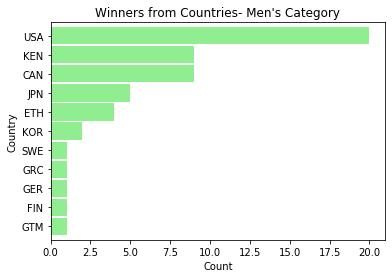

In [308]:
#plotting winners' country data in men's category
pd.value_counts(df_menwinners_1897_2019['residence'], ascending=True).plot(kind='barh', width=0.9, color='lightgreen')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title("Winners from Countries- Men's Category")

In [309]:
df_menwinners_1897_2019['age']=df_menwinners_1897_2019['age'].astype(int)

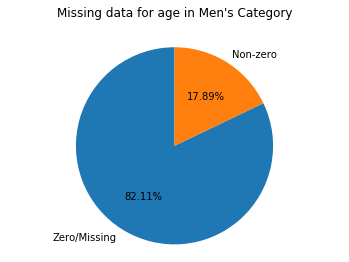

In [310]:
#nalyzing age data in men's category 
age_nonzero_mens = np.count_nonzero(df_menwinners_1897_2019['age'])
age_zero_mens = len(df_menwinners_1897_2019['age'])-age_nonzero_mens
labels=['Zero/Missing', 'Non-zero']
values=[age_zero_mens, age_nonzero_mens]
plt.pie(values, labels=labels, autopct='%1.2f%%', startangle=90)
plt.axis('equal') 
plt.title("Missing data for age in Men's Category\n")
plt.show()

Text(0.5, 1.0, "Winners' Age Distribution- Men's Category")

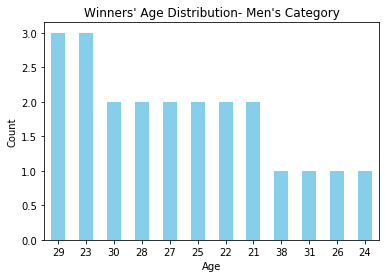

In [311]:
#plotting winners' age distribution in men's category
pd.value_counts(df_menwinners_1897_2019['age'])[1:].plot(kind='bar', color='skyblue') 
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title("Winners' Age Distribution- Men's Category")

### Looking at data in Women's Category

In [312]:
df_womenwinners_1897_2019.describe()

,year,division_result,gender_result,finishing_time_seconds
count,48.00,48.0,48.0,48.000000
mean,1995.50,1.0,1.0,8991.541667
std,14.00,0.0,0.0,662.965933
min,1972.00,1.0,1.0,8195.000000
25%,1983.75,1.0,1.0,8630.500000
50%,1995.50,1.0,1.0,8724.500000
75%,2007.25,1.0,1.0,9116.500000
max,2019.00,1.0,1.0,11426.000000


In [313]:
#checking for missing data
df_womenwinners_1897_2019.isnull().sum()

year                       0
age                        0
name                       0
division_result            0
gender                     0
gender_result              0
official_time              0
overall                    0
residence                 33
finishing_time_seconds     0
dtype: int64

In [314]:
df_womenwinners_1897_2019['residence'].describe()

count          15
unique         12
top       Eldoret
freq            3
Name: residence, dtype: object

In [315]:
pd.value_counts(df_womenwinners_1897_2019['residence'], ascending=True).head()

Russia     1
Ethiopi    1
Bomet      1
Arsi       1
United     1
Name: residence, dtype: int64

In [316]:
#mapping cities and states to countries (using Alpha-3 codes)
df_womenwinners_1897_2019['residence'] = df_womenwinners_1897_2019['residence'].map(
    {'Nyeri':'KEN','Russia':'RUS','Cheboksory':'RUS','Ethiopi':'ETH','Marakwet':'KEN','Arsi':'ETH','Bomet':'KEN','ETH':'ETH',
     'Kisii':'KEN','United ':'USA','KEN':'KEN','Eldoret':'KEN'})

Text(0.5, 1.0, "Winners from Countries- Women's Category")

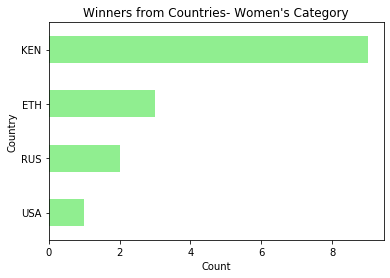

In [317]:
#plotting winners' country data in women's category
pd.value_counts(df_womenwinners_1897_2019['residence'], ascending=True).plot(kind='barh', color='lightgreen')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title("Winners from Countries- Women's Category")

In [318]:
df_womenwinners_1897_2019['age']=df_womenwinners_1897_2019['age'].astype(int)

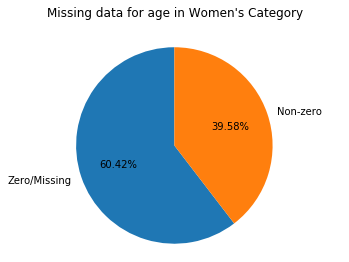

In [319]:
#analyzing age data in women's category 
age_nonzero_womens = np.count_nonzero(df_womenwinners_1897_2019['age'])
age_zero_womens = len(df_womenwinners_1897_2019['age'])-age_nonzero_womens
labels=['Zero/Missing', 'Non-zero']
values=[age_zero_womens, age_nonzero_womens]
plt.pie(values, labels=labels, autopct='%1.2f%%', startangle=90)
plt.axis('equal') 
plt.title("Missing data for age in Women's Category\n")
plt.show()

Text(0.5, 1.0, "Winners' Age Distribution- Women's Category")

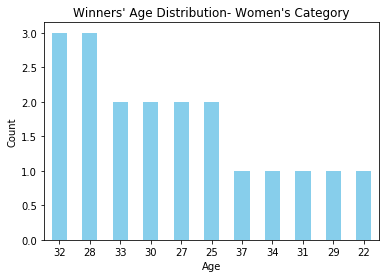

In [320]:
#plotting winners' age distribution in women's category
pd.value_counts(df_womenwinners_1897_2019['age'])[1:].plot(kind='bar', color='skyblue') 
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title("Winners' Age Distribution- Women's Category")

### Evolution of Finishing Time

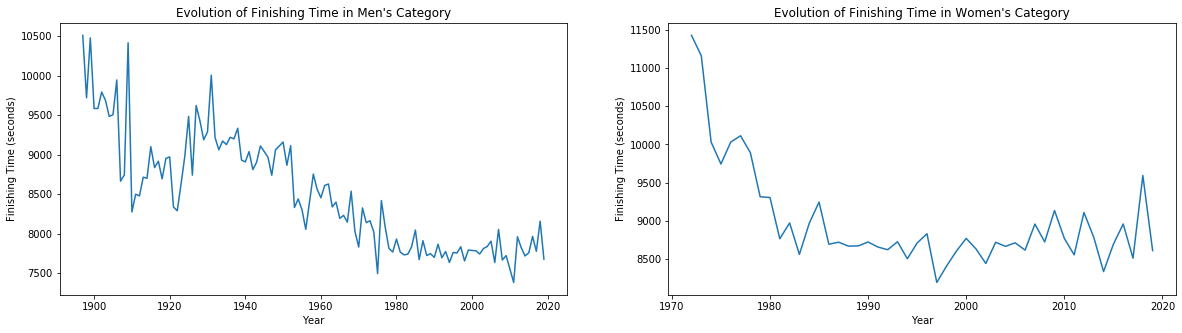

In [321]:
#evolution of finishing time in boston marathon from 1897 to 2019
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5));
ax[0].plot(df_menwinners_1897_2019['year'],df_menwinners_1897_2019['finishing_time_seconds']);
ax[0].set_title("Evolution of Finishing Time in Men's Category");
ax[0].set_xlabel('Year');
ax[0].set_ylabel('Finishing Time (seconds)');

ax[1].plot(df_womenwinners_1897_2019['year'],df_womenwinners_1897_2019['finishing_time_seconds']);
ax[1].set_title("Evolution of Finishing Time in Women's Category");
ax[1].set_xlabel('Year');
ax[1].set_ylabel('Finishing Time (seconds)');

### Interdependence between Finishing Time and Weather Data

In [322]:
#weather data source: https://www.baa.org/races/boston-marathon/history
df_weatherdata = pd.read_csv(r'WeatherData.csv')

In [323]:
df_weatherdata

,year,hopkinton_temp,boston_temp,wind,sky
0,2000,50,47,N/NE 7–12 mph,Cloudy
1,2001,53,54,N/NE 1–5 mph,Partly Cloudy
2,2002,53,56,N/NE 1–5 mph,Mostly Cloudy
3,2003,70,59,Variable 3–8 mph,Clear
4,2004,83,86,WSW/SW/W 8–11 mph,NaN
5,2005,70,66,E/NE 5–8 mph,Clear
6,2006,55,53,Calm,Clear
7,2007,47,50,E/ESE 20–30 mph,Overcast and Rain
8,2008,53,53,W 2 mph,Clear
9,2009,51,47,E/SE 9–16 mph,Partly Cloudy


In [324]:
df_mens_ft_weather = pd.merge(df_menwinners_1897_2019, df_weatherdata, on='year', how='inner')
df_mens_ft_weather = df_mens_ft_weather.drop(columns=['wind','sky','age','name','division_result','gender','gender_result','official_time','overall','residence'])
df_mens_ft_weather

,year,finishing_time_seconds,hopkinton_temp,boston_temp
0,2000,7787.0,50,47
1,2001,7783.0,53,54
2,2002,7742.0,53,56
3,2003,7811.0,70,59
4,2004,7837.0,83,86
5,2005,7905.0,70,66
6,2006,7634.0,55,53
7,2007,8053.0,47,50
8,2008,7666.0,53,53
9,2009,7722.0,51,47


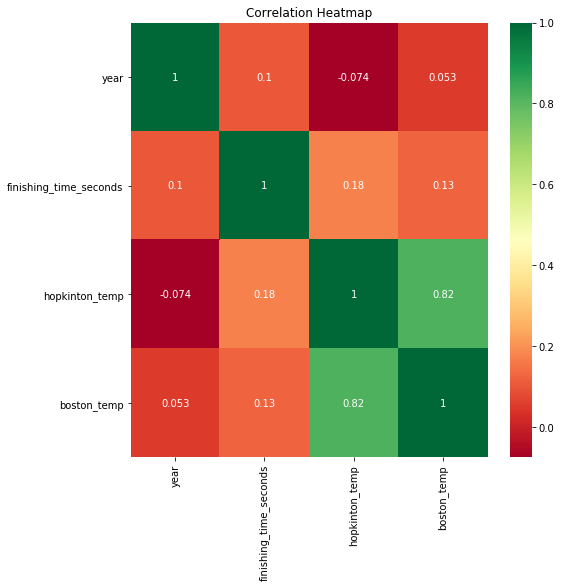

In [325]:
plt.figure(figsize=(8,8))
heatmap = sns.heatmap(df_mens_ft_weather.corr(), annot=True, cmap="RdYlGn")
heatmap.set_title('Correlation Heatmap');

<Figure size 3600x3600 with 0 Axes>

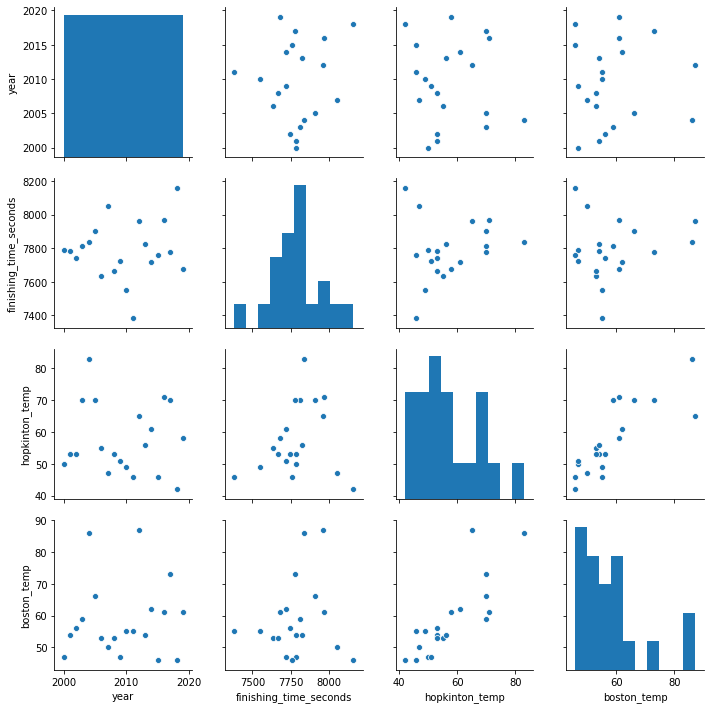

In [326]:
plt.figure(figsize=(50,50))
sns.pairplot(df_mens_ft_weather)

### Forecasting using ARIMA Model

In [327]:
#Forecasting model for Men's Category
ts_mens_winnerstime = df_menwinners_1897_2019[['year','finishing_time_seconds']]

In [328]:
ts_mens_winnerstime['year'] = ts_mens_winnerstime['year'].astype(str)+'-04-15'
ts_mens_winnerstime['year'] = pd.to_datetime(ts_mens_winnerstime['year'])
ts_mens_winnerstime.head()

,year,finishing_time_seconds
0,1897-04-15,10510.0
1,1898-04-15,9720.0
2,1899-04-15,10478.0
3,1900-04-15,9584.0
4,1901-04-15,9584.0


In [329]:
#checking if timeseries is stationary or not
def stationarity_check(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    print('The test statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Lags used: %f' % result[2])
    print('Number of Observations Used: %f' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('%s: %.3f' % (key, value))
    if result[1] <= 0.05:
        print("Timeseries is stationary.")
    else:
        print("Timeseries is non-stationary.")

In [330]:
stationarity_check(ts_mens_winnerstime['finishing_time_seconds'])

The test statistic: -2.070235
p-value: 0.256650
Lags used: 3.000000
Number of Observations Used: 119.000000
Critical Values:
1%: -3.487
5%: -2.886
10%: -2.580
Timeseries is non-stationary.


In [331]:
#first differencing
ts_mens_diff = ts_mens_winnerstime['finishing_time_seconds'] - ts_mens_winnerstime['finishing_time_seconds'].shift(1)
ts_mens_diff.head()

0      NaN
1   -790.0
2    758.0
3   -894.0
4      0.0
Name: finishing_time_seconds, dtype: float64

In [332]:
stationarity_check(ts_mens_diff.dropna())

The test statistic: -10.143861
p-value: 0.000000
Lags used: 2.000000
Number of Observations Used: 119.000000
Critical Values:
1%: -3.487
5%: -2.886
10%: -2.580
Timeseries is stationary.


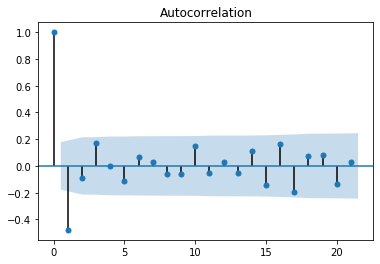

In [333]:
#autocorrrelation plot
plot_acf(ts_mens_diff.dropna());

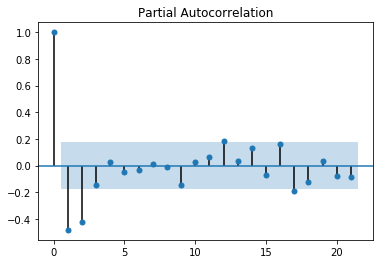

In [334]:
#partial autocorrrelation plot
plot_pacf(ts_mens_diff.dropna());

In [335]:
#splitting data into train and test
X_train_ts_mens = ts_mens_winnerstime[ts_mens_winnerstime['year'] <= '2014-04-15']
X_test_ts_mens = ts_mens_winnerstime[ts_mens_winnerstime['year'] > '2014-04-15']

print('X_train Shape', X_train_ts_mens.shape)
print('X_test Shape', X_test_ts_mens.shape)

X_train Shape (118, 2)
X_test Shape (5, 2)


In [336]:
#fitting ARIMA model
y1 = X_train_ts_mens['finishing_time_seconds'].values
model_arima = ARIMA(y1, order=(2,1,2)).fit()

Text(0.5, 1.0, 'Model Fit')

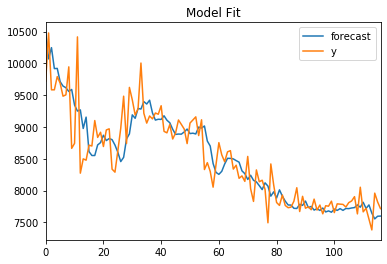

In [337]:
model_arima.plot_predict(dynamic=False)
plt.title("Model Fit")

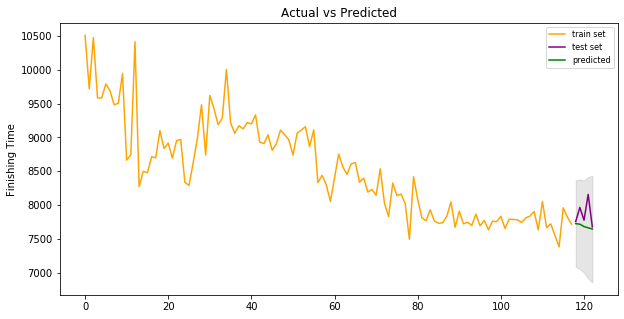

In [338]:
#prediction on test set
fc, se, conf = model_arima.forecast(len(X_test_ts_mens))

fc_series = pd.Series(fc, index=X_test_ts_mens['finishing_time_seconds'].index)
lower_series = pd.Series(conf[:, 0], index=X_test_ts_mens['finishing_time_seconds'].index)
upper_series = pd.Series(conf[:, 1], index=X_test_ts_mens['finishing_time_seconds'].index)

plt.figure(figsize=(10,5))
plt.plot(X_train_ts_mens['finishing_time_seconds'], label='train set',color='orange')
plt.plot(X_test_ts_mens['finishing_time_seconds'], label='test set', color='purple')
plt.plot(fc_series, label='predicted', color='green')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.title('Actual vs Predicted')
plt.legend(loc='upper right', fontsize=8)
plt.ylabel("Finishing Time")
plt.show();

In [339]:
print("RMSE of ARIMA model: ", rmse(X_test_ts_mens['finishing_time_seconds'], model_arima.forecast(len(X_test_ts_mens))[0]))

RMSE of ARIMA model:  251.69137377863413


In [340]:
#Forecasting model for women's Category
ts_womens_winnerstime = df_womenwinners_1897_2019[['year','finishing_time_seconds']]

In [341]:
ts_womens_winnerstime['year'] = ts_womens_winnerstime['year'].astype(str)+'-04-15'
ts_womens_winnerstime['year'] = pd.to_datetime(ts_womens_winnerstime['year'])
ts_womens_winnerstime.head()

,year,finishing_time_seconds
0,1972-04-15,11426.0
1,1973-04-15,11159.0
2,1974-04-15,10031.0
3,1975-04-15,9744.0
4,1976-04-15,10030.0


In [342]:
stationarity_check(ts_womens_winnerstime['finishing_time_seconds'])

The test statistic: -4.296432
p-value: 0.000451
Lags used: 0.000000
Number of Observations Used: 47.000000
Critical Values:
1%: -3.578
5%: -2.925
10%: -2.601
Timeseries is stationary.


In [343]:
#splitting data into train and test
X_train_ts_womens = ts_womens_winnerstime[ts_womens_winnerstime['year'] <= '2016-04-15']
X_test_ts_womens = ts_womens_winnerstime[ts_womens_winnerstime['year'] > '2016-04-15']

print('X_train Shape', X_train_ts_womens.shape)
print('X_test Shape', X_test_ts_womens.shape)

X_train Shape (45, 2)
X_test Shape (3, 2)


In [344]:
#fitting ARIMA model
y11 = X_train_ts_womens['finishing_time_seconds'].values
model_arima_2 = ARIMA(y11, order=(1,0,1)).fit()

Text(0.5, 1.0, 'Model Fit')

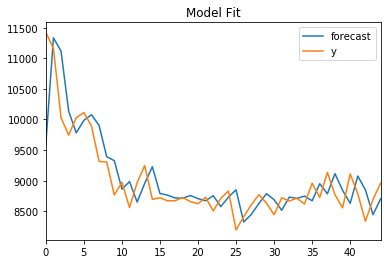

In [345]:
model_arima_2.plot_predict(dynamic=False)
plt.title("Model Fit")

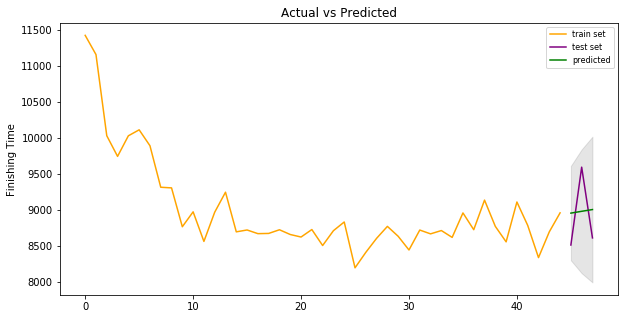

In [346]:
#prediction on test set
fc, se, conf = model_arima_2.forecast(len(X_test_ts_womens))

fc_series = pd.Series(fc, index=X_test_ts_womens['finishing_time_seconds'].index)
lower_series = pd.Series(conf[:, 0], index=X_test_ts_womens['finishing_time_seconds'].index)
upper_series = pd.Series(conf[:, 1], index=X_test_ts_womens['finishing_time_seconds'].index)

plt.figure(figsize=(10,5))
plt.plot(X_train_ts_womens['finishing_time_seconds'], label='train set',color='orange')
plt.plot(X_test_ts_womens['finishing_time_seconds'], label='test set', color='purple')
plt.plot(fc_series, label='predicted', color='green')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.title('Actual vs Predicted')
plt.legend(loc='upper right', fontsize=8)
plt.ylabel("Finishing Time")
plt.show();

In [347]:
print("RMSE of ARIMA model: ", rmse(X_test_ts_womens['finishing_time_seconds'], model_arima_2.forecast(len(X_test_ts_womens))[0]))

RMSE of ARIMA model:  492.5865806975254
